In [1]:
# import necessary laibary
import pandas as pd
import numpy as np

# import visulaization laibary
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import encode
from sklearn.preprocessing import LabelEncoder

# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Basic Nlp laibary
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter

In [3]:
# loaded Regression model 
from sklearn.linear_model import LogisticRegression
# laoded classifier model
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# loaded ensemble model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Loaded diffrent model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [5]:
# loaded metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,balanced_accuracy_score,f1_score,precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [6]:
# laod dataset
df=pd.read_csv('spam.csv')
# upper five row
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df=df.replace(" ",np.nan)  #check white space in datset

In [10]:
# check shape
print(f"In our dataset number of row is {df.shape[0]}, and number of columns is {df.shape[1]}")

In our dataset number of row is 5572, and number of columns is 5


In [11]:
# cehck null values in dataset
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In our dataset columns v1 and v2 are free from null values and in last 3 columns lots of null values arre present

# Cleaning Data process

In [12]:
# create a tempory frame to see in which columns how much null values are present
null=pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum())
null.columns=['Null Values']
null['% of null values']=null['Null Values']*100/5572
null

,Null Values,% of null values
Unnamed: 2,5522,99.102656
Unnamed: 3,5560,99.784637
Unnamed: 4,5566,99.892319


Here in these 3 columns lot of null values so we drop it

In [13]:
# drop null values columns for do better for daatset
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [14]:
# check null values after removing null values columns
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# check null values after removing columns
df.isnull().any()

v1    False
v2    False
dtype: bool

Now no null values are present in dataset

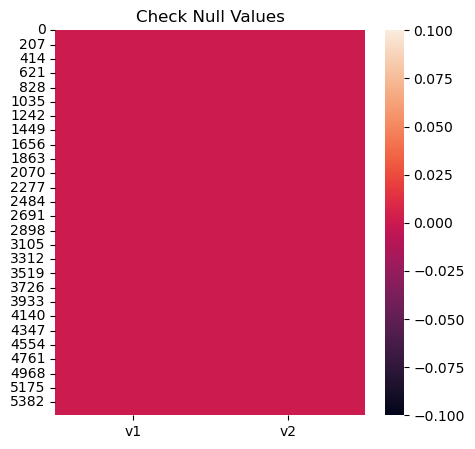

In [16]:
# check null values by heatmap
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())
plt.title('Check Null Values')
plt.show()

In [17]:
# check unique values
df.nunique().to_frame('No of Unique Values')

,No of Unique Values
v1,2
v2,5169


Here in target columns v1 2 type present i.e. ham and spam and in v2 mean text columns many unique values are present

In [18]:
# rename both columns for better understanding
df=df.rename(columns={'v1':'label','v2':'mail'})
df

,label,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


for better understanding we convert columns v1 and v2 in label and mail

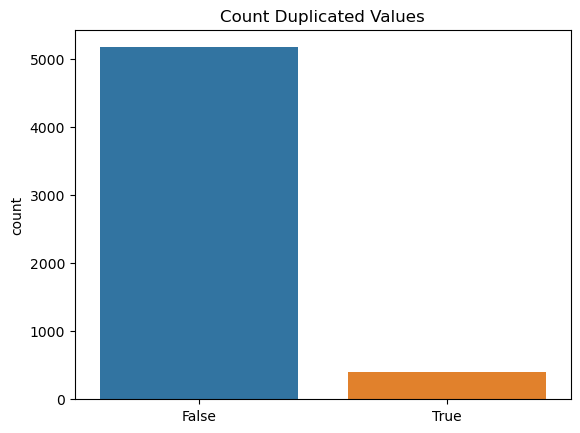

False    5169
True      403
dtype: int64

In [19]:
# Check duplicated values in our dataset

sns.countplot(df.duplicated())
plt.title('Count Duplicated Values')
plt.show()
df.duplicated().value_counts()

In our dataset number of duplicated  values are present near 403 out of 5572. we remove it beco better understanding during modelling process

In [20]:
# drop duplicated values
df=df.drop_duplicates(keep='first')
df

,label,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
# check duplicated values again
df.duplicated().value_counts()

False    5169
dtype: int64

No duplicated values are present in our dataset

In [22]:
# check shape after removing columns and duplicated values
print(f"Now in our dataset number of row is {df.shape[0]}, and number of columns is {df.shape[1]}")

Now in our dataset number of row is 5169, and number of columns is 2


# Target

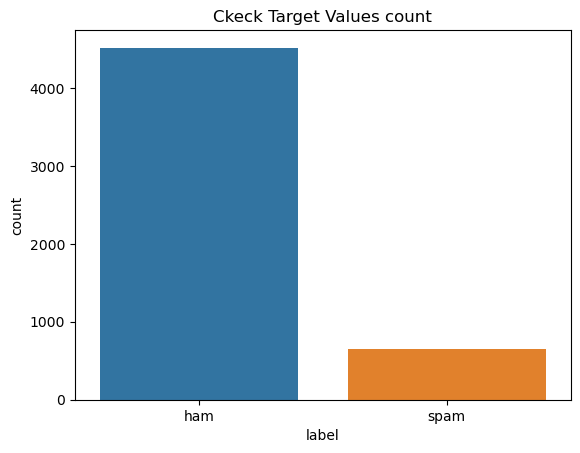

ham     4516
spam     653
Name: label, dtype: int64

In [23]:
# target variable count

sns.countplot(df['label'])
plt.title('Ckeck Target Values count')
plt.show()
df['label'].value_counts()

In our dataset imbalanceing probelam , this is happen bcoz of our label variable are mot equal. This is do later before modeling

In [24]:
# apply label encodel on target columns
le=LabelEncoder()

In [25]:
df['label']=le.fit_transform(df['label'])
df

,label,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


we convert our target variable ham into 0 and spam into 1 for better understanding

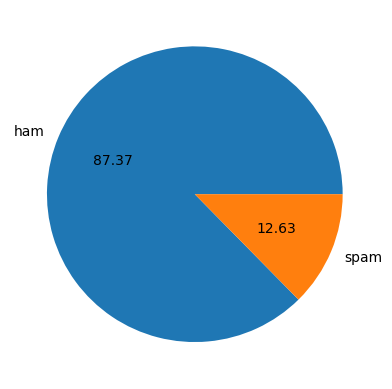

In [26]:
# check target column role
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

The percentage of ham mean no spam is 87.37% and spam mean yes is 12.63%

# Preprocessing of NLP

In [27]:
# create mail count word variable colum
df['mail_word_count']=df['mail'].apply(len)
df.head()

,label,mail,mail_word_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


we creatr a new column of mail_word_count by this we understanding that how much words re used in mail genellary

In [28]:
# create a text columns for tokenize sentance
df['text']=df['mail'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,label,mail,mail_word_count,text
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


we create a new columns of text, under this how much text are coming into a mail

In [29]:
# Now we create a seneatnce based tokenize columns
df['sentance']=df['mail'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,label,mail,mail_word_count,text,sentance
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


we created a columns name sentance in this how much sentance are in a mail

Now see that in this new created columns are how much correlated with target

# Describe Statistic

In [30]:
# check in our text are outliers and skewness
df[['mail_word_count','text','sentance']].describe()

,mail_word_count,text,sentance
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.453279,1.947185
std,58.236795,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


Here we clearly seen that in our dataset more level skewness are not present but outliers are present in dataset

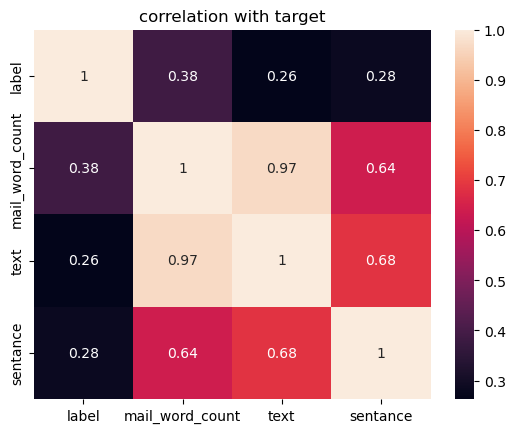

In [31]:
# check correlation with target column
sns.heatmap(df.corr(), annot=True)
plt.title('correlation with target')
plt.show()

As we sse that mail count is correlated with target with 38%.

As we see that text is correlated with target with 26%.

As we see that sentances is correlated with target with 28%.

After observation mail word count is highly correlated with target so it is good for our sentances.
Here i observ that some multicolinility are present in our dataset

# NLP-Process

In [32]:
# stopwords = stopwords.words('english')
ps =PorterStemmer()

In [33]:
# by lemmetizer we found root word of given word
from nltk.stem import WordNetLemmatizer

In [34]:
# define a text for where we input our text msg and mail for ckeck it is spam and no
def text_nlp(text):
    #first of all we convert all the text into lower case.for better understanding for python
    text=text.lower()
    #After lower text we apply tokenize text into separated word
    text=nltk.word_tokenize(text)
    
    #Now create empty list for remove sign type data like $%^&**()
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    #now we remove punctuation from text after apply all these method
    punc=[]
    for i in y:
            if i not in string.punctuation:
                punc.append(i)
    #now removing stopping word from dictionary from stopwords.words('english')
    stopword=[]
    for i in punc:
         if i not in stopwords.words('english'):
                stopword.append(i)
    #now remove root word varient like cook-->cooked,cooking,cooks etc        
    lemme=[]
    for i in stopword:
         lemme.append(WordNetLemmatizer().lemmatize(i))
    #after all these process we join all with a suitable space between word    
    return " ".join(lemme)
            

In [35]:
# now we send our data mail columns into define text_nlp(text) and create a new variable column text nlp after apply all this process
df['text_nlp']=df['mail'].apply(text_nlp)

In [36]:
df.head()

,label,mail,mail_word_count,text,sentance,text_nlp
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


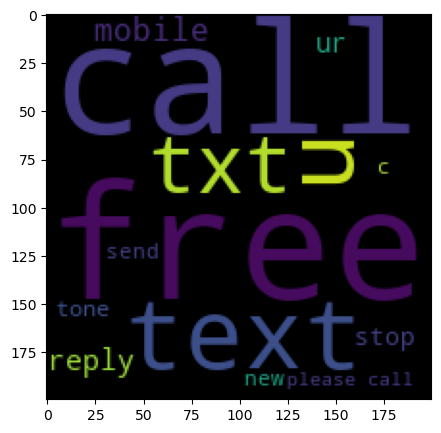

In [37]:
# check most common word in img formate from tst is spam
wc=WordCloud(width=200, height=200,min_font_size=10,background_color='black')
spam_wc=wc.generate(df[df['label']==1]['text_nlp'].str.cat(sep=" "))
plt.figure(figsize=(12,5))
plt.imshow(spam_wc)
plt.show()

which words are most used dring spam text

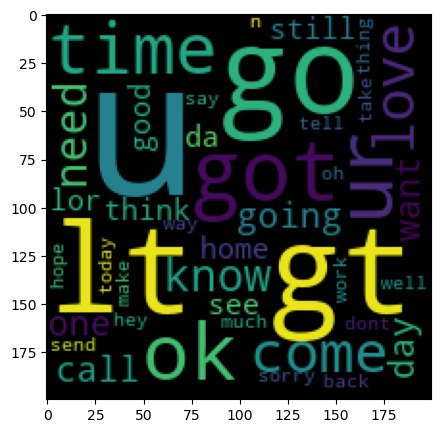

In [38]:
# check most common word in img formate from tst is not spam
wc=WordCloud(width=200, height=200,min_font_size=10,background_color='black')
ham_wc=wc.generate(df[df['label']==0]['text_nlp'].str.cat(sep=" "))
plt.figure(figsize=(12,5))
plt.imshow(ham_wc)
plt.show()

In [39]:
# now creat a list of split word in count
count=[]
for i in df[df['label']==1]['text_nlp'].tolist():
    for msg in i.split():
        count.append(msg)

In [40]:
# check len of msg spam txt
len(count)

9939

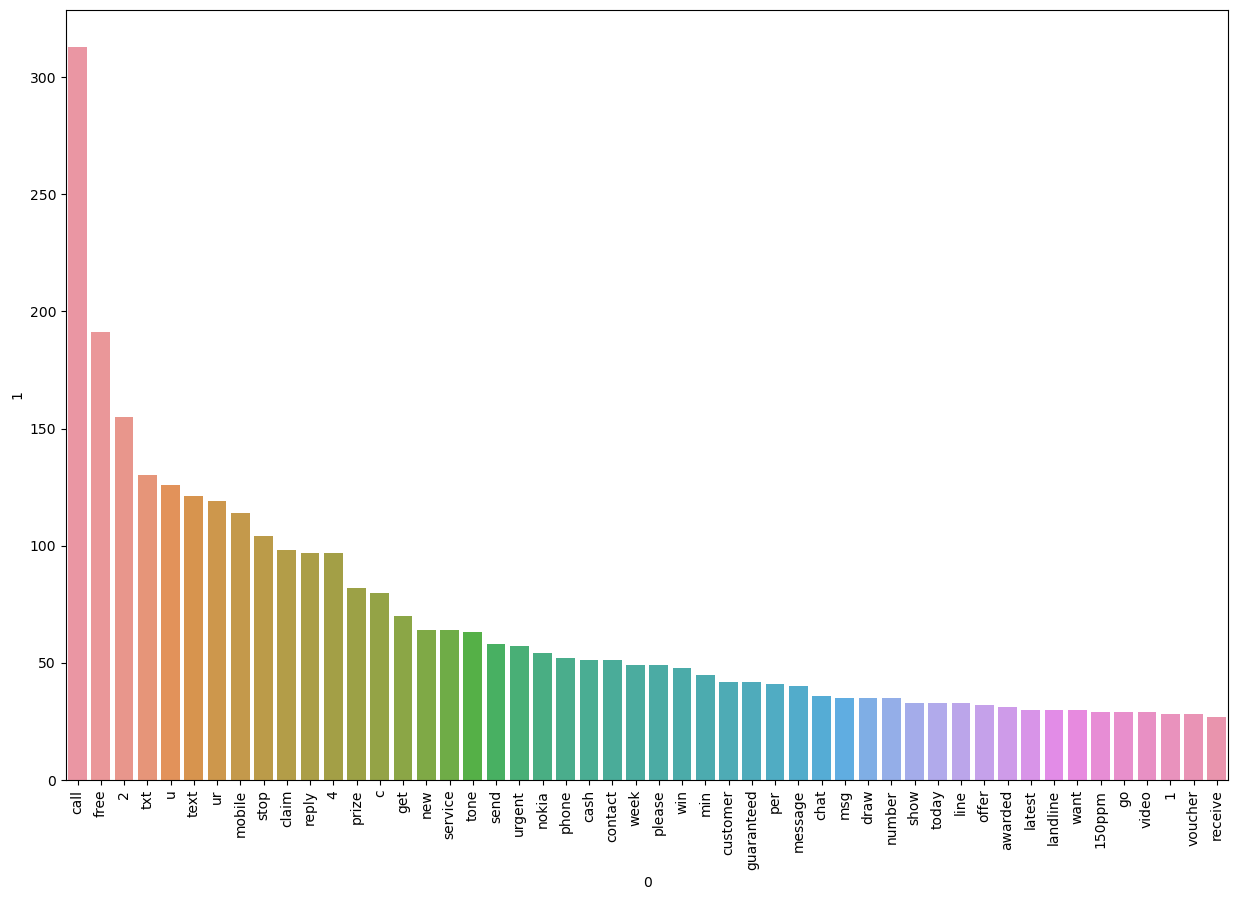

In [41]:
# now see msg is spam most common word
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(count).most_common(50))[0],pd.DataFrame(Counter(count).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
# Now create a count_ham for msg is not spam
count_ham=[]
for i in df[df['label']==0]['text_nlp'].tolist():
    for msg in i.split():
        count_ham.append(msg)

In [43]:
len(count)

9939

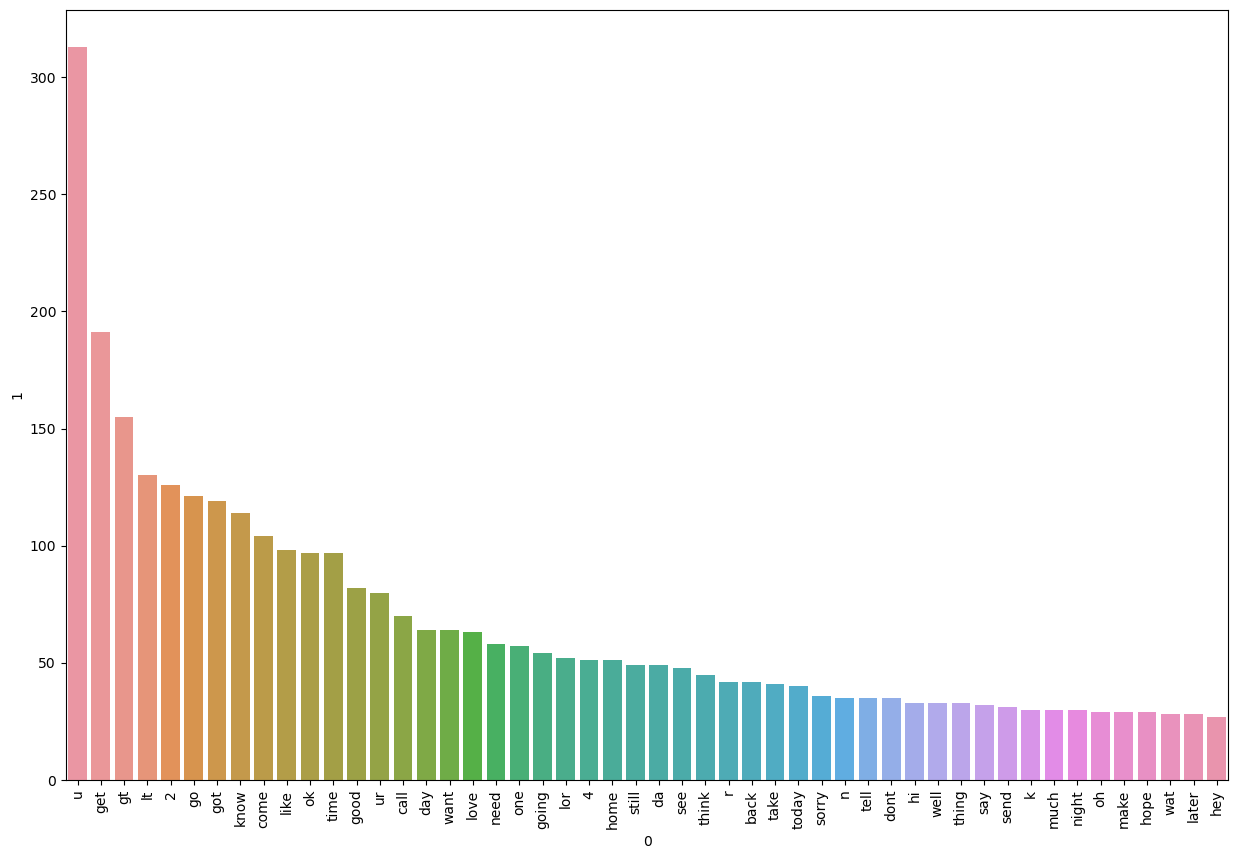

In [44]:
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(count_ham).most_common(50))[0],pd.DataFrame(Counter(count).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

# Vectorize Data

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [46]:
# convert text into array form for undestand for model
cv=CountVectorizer()
tfid=TfidfVectorizer(max_features=3000, stop_words='english', analyzer='word')
x=tfid.fit_transform(df['text_nlp'],).toarray()

In [47]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
# removing unbalancing problem in target columns
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

In [49]:
# assign dependent variable in y
y=df.label  

# Smote Technique

In [50]:
!pip install imblearn

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
# apply smote annalysis on dependent variable for far unbalncing problem
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [53]:
y.value_counts()

0    4516
1    4516
Name: label, dtype: int64

Now in our dependent variable both are equal

# Apply MIN-MAX scaler

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
st=MinMaxScaler()
x=st.fit_transform(x)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Now our target variable both are equal, so we Now apply model 

In [56]:
# Creating instances for different Classifiers
LO=LogisticRegression()
MU=MultinomialNB()
GB=GaussianNB()
BN=BernoulliNB()
# SV = SVC(gamma='auto')
DTC = DecisionTreeClassifier()
KN=KNeighborsClassifier()
AD=AdaBoostClassifier()
GR=GradientBoostingClassifier()
RF = RandomForestClassifier()

# Creating a list model where all the models will be appended for further evaluation in loop.
models=[]
models.append(('LogisticRegression',LO))
models.append(('MultinomialNB',MU))
models.append(('GaussianNB',GB))
models.append(('Bernoulli',BN))
# models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KneighborsClassifier',KN))
models.append(('AdaBoostClassifier',AD))
models.append(('GradientBoostingClassifier',GR))
models.append(('RandomForestClassifier',RF))

****************************** LogisticRegression ******************************
The maximum accuracy score of LogisticRegression is 0.9667957941339236 is achieved at 20


Accuracy_Score:  96.51355838406198
Accuracy Score of Model  : 96.33217993079585
AUC_Score: 96.52164751943512
Model_with Dataset: 96.33217993079585
Cross Validation Score:  95.84797891306171
Precision Score: 99.41383352872217


Confusion matrix: 

[[896   5]
 [ 58 848]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       901
           1       0.99      0.94      0.96       906

    accuracy                           0.97      1807
   macro avg       0.97      0.97      0.97      1807
weighted avg       0.97      0.97      0.97      1807



<Figure size 500x500 with 0 Axes>

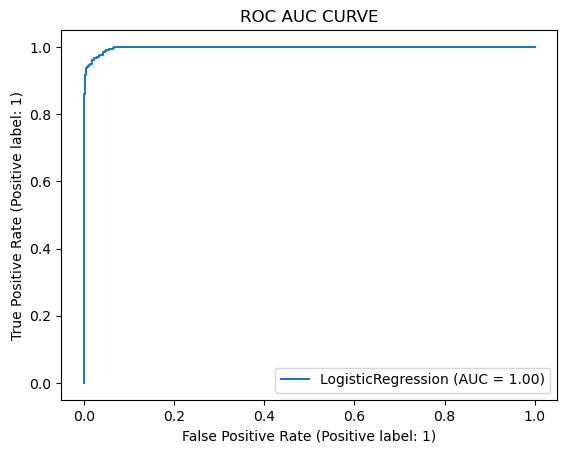





****************************** MultinomialNB ******************************
The maximum accuracy score of MultinomialNB is 0.9789706696181516 is achieved at 23


Accuracy_Score:  97.45434421693415
Accuracy Score of Model  : 98.02076124567473
AUC_Score: 97.45463098396925
Model_with Dataset: 98.02076124567473
Cross Validation Score:  97.44255911396618
Precision Score: 97.56637168141593


Confusion matrix: 

[[879  22]
 [ 24 882]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       901
           1       0.98      0.97      0.97       906

    accuracy                           0.97      1807
   macro avg       0.97      0.97      0.97      1807
weighted avg       0.97      0.97      0.97      1807



<Figure size 500x500 with 0 Axes>

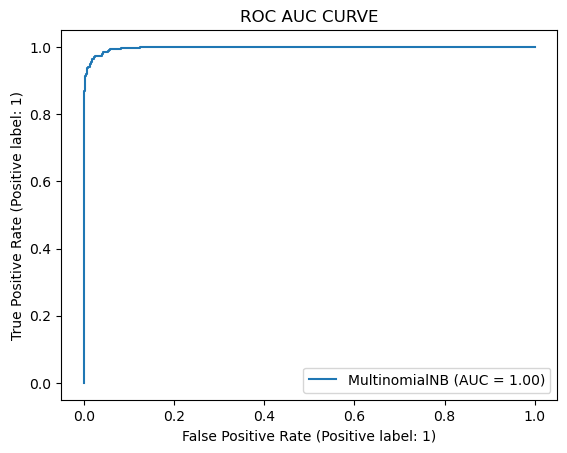





****************************** GaussianNB ******************************
The maximum accuracy score of GaussianNB is 0.9319313779745434 is achieved at 20


Accuracy_Score:  93.13779745434422
Accuracy Score of Model  : 93.31487889273356
AUC_Score: 93.11875693673696
Model_with Dataset: 93.31487889273356
Cross Validation Score:  92.6816471688481
Precision Score: 87.96116504854369


Confusion matrix: 

[[777 124]
 [  0 906]]


Classification Report:
 
              precision    recall  f1-score   support

           0       1.00      0.86      0.93       901
           1       0.88      1.00      0.94       906

    accuracy                           0.93      1807
   macro avg       0.94      0.93      0.93      1807
weighted avg       0.94      0.93      0.93      1807



<Figure size 500x500 with 0 Axes>

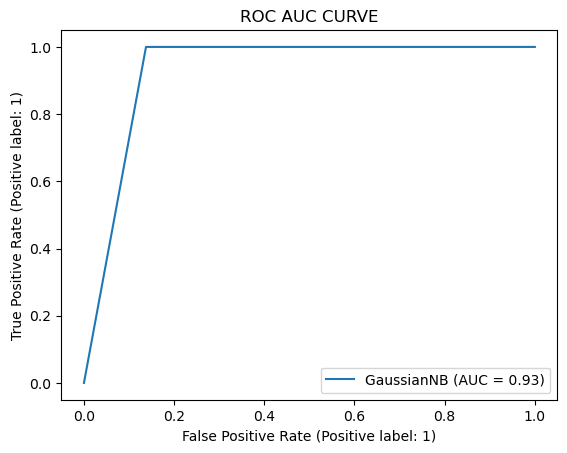





****************************** Bernoulli ******************************
The maximum accuracy score of Bernoulli is 0.9833978970669618 is achieved at 38


Accuracy_Score:  97.78638627559491
Accuracy Score of Model  : 97.91003460207612
AUC_Score: 97.79157570812906
Model_with Dataset: 97.91003460207612
Cross Validation Score:  97.78576116872921
Precision Score: 99.6559633027523


Confusion matrix: 

[[898   3]
 [ 37 869]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       901
           1       1.00      0.96      0.98       906

    accuracy                           0.98      1807
   macro avg       0.98      0.98      0.98      1807
weighted avg       0.98      0.98      0.98      1807



<Figure size 500x500 with 0 Axes>

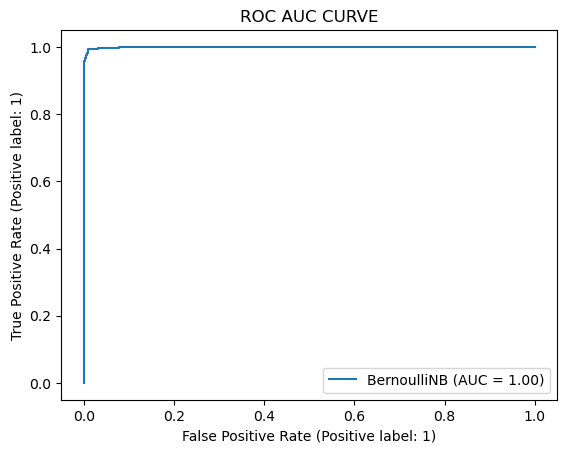





****************************** DecisionTreeClassifier ******************************
The maximum accuracy score of DecisionTreeClassifier is 0.9822910902047592 is achieved at 20


Accuracy_Score:  97.12230215827337
Accuracy Score of Model  : 99.90311418685121
AUC_Score: 97.11921754832133
Model_with Dataset: 99.90311418685121
Cross Validation Score:  97.50888785521545
Precision Score: 96.11231101511879


Confusion matrix: 

[[865  36]
 [ 16 890]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       901
           1       0.96      0.98      0.97       906

    accuracy                           0.97      1807
   macro avg       0.97      0.97      0.97      1807
weighted avg       0.97      0.97      0.97      1807



<Figure size 500x500 with 0 Axes>

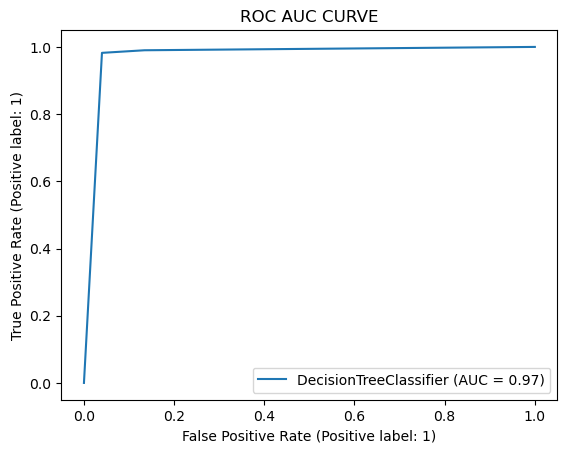





****************************** KneighborsClassifier ******************************
The maximum accuracy score of KneighborsClassifier is 0.8151632540121748 is achieved at 29


Accuracy_Score:  81.40564471499724
Accuracy Score of Model  : 83.7923875432526
AUC_Score: 81.36140123924116
Model_with Dataset: 83.7923875432526
Cross Validation Score:  80.41414555552085
Precision Score: 73.86934673366834


Confusion matrix: 

[[589 312]
 [ 24 882]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.96      0.65      0.78       901
           1       0.74      0.97      0.84       906

    accuracy                           0.81      1807
   macro avg       0.85      0.81      0.81      1807
weighted avg       0.85      0.81      0.81      1807



<Figure size 500x500 with 0 Axes>

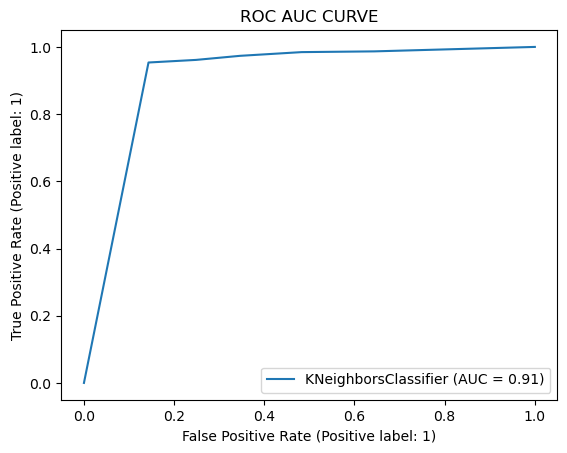





****************************** AdaBoostClassifier ******************************
The maximum accuracy score of AdaBoostClassifier is 0.9662423907028224 is achieved at 38


Accuracy_Score:  96.18151632540122
Accuracy Score of Model  : 96.23529411764706
AUC_Score: 96.18133396054911
Model_with Dataset: 96.23529411764706
Cross Validation Score:  95.44963262714644
Precision Score: 96.14112458654907


Confusion matrix: 

[[866  35]
 [ 34 872]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       901
           1       0.96      0.96      0.96       906

    accuracy                           0.96      1807
   macro avg       0.96      0.96      0.96      1807
weighted avg       0.96      0.96      0.96      1807



<Figure size 500x500 with 0 Axes>

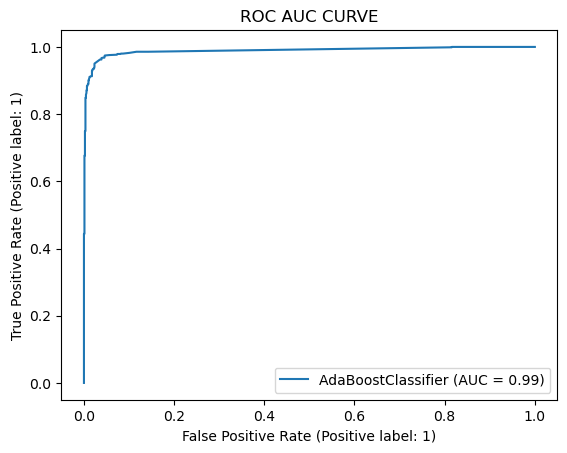





****************************** GradientBoostingClassifier ******************************
The maximum accuracy score of GradientBoostingClassifier is 0.9562811289429994 is achieved at 38


Accuracy_Score:  95.01936912008856
Accuracy Score of Model  : 95.41868512110727
AUC_Score: 95.02668117103144
Model_with Dataset: 95.41868512110727
Cross Validation Score:  94.80756207709528
Precision Score: 97.55244755244755


Confusion matrix: 

[[880  21]
 [ 69 837]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       901
           1       0.98      0.92      0.95       906

    accuracy                           0.95      1807
   macro avg       0.95      0.95      0.95      1807
weighted avg       0.95      0.95      0.95      1807



<Figure size 500x500 with 0 Axes>

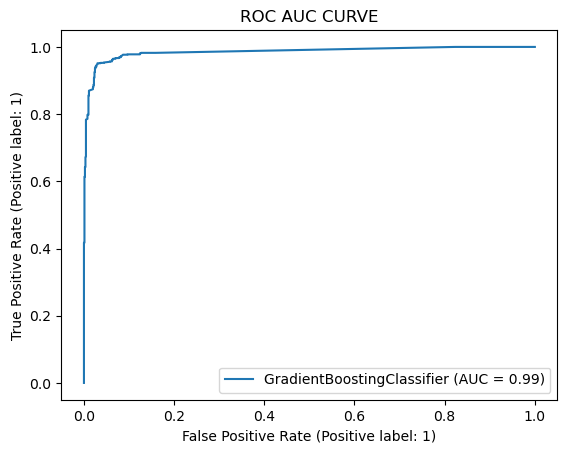





****************************** RandomForestClassifier ******************************
The maximum accuracy score of RandomForestClassifier is 0.9922523519645822 is achieved at 20


Accuracy_Score:  98.94853348090759
Accuracy Score of Model  : 99.90311418685121
AUC_Score: 98.94837230156337
Model_with Dataset: 99.90311418685121
Cross Validation Score:  98.9260418907399
Precision Score: 98.89746416758544


Confusion matrix: 

[[891  10]
 [  9 897]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       901
           1       0.99      0.99      0.99       906

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



<Figure size 500x500 with 0 Axes>

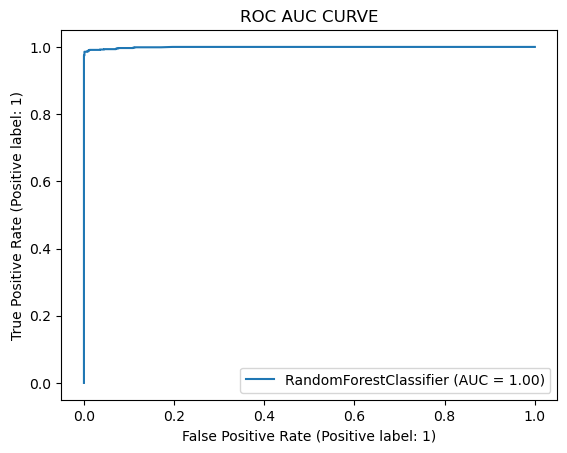

In [57]:
# Creating empty lists
Model = []
Acc_score = []
Model_score=[]
cvs = []
Precision_Score=[]
Roc_score=[]

for name,model in models:
    print("******************************",name,"******************************")
    # Determining Best Random State
    
    max_score=0
    for r_state in range (20,40):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc_score=accuracy_score(y_test,pred)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score of", name ,"is", max_score, "is achieved at", final_r_state)
    print("\n")
    
    #Model.append(name)
    Model.append(name)
    model.fit(x_train,y_train)
    
    #print(model)
    y_pred=model.predict(x_test)
    
    # Accuracy Score
    acc_score=accuracy_score(y_test,y_pred)*100
    print('Accuracy_Score: ',acc_score)
    Acc_score.append(acc_score)
    
    #trainning score
    pred_train=model.predict(x_train)
    print(f"Accuracy Score of Model  : {(accuracy_score(y_train,pred_train)*100)}")
    
    #roc_score
    auc_score=roc_auc_score(y_test,y_pred)*100
    print('AUC_Score:',auc_score)
    Roc_score.append(auc_score)
        
    #model working with dataset
    dataset_score=model.score(x_train,y_train)*100
    print('Model_with Dataset:',dataset_score)
    Model_score.append(dataset_score)
    
    # Cross Validation Score
    cv=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()*100
    print('Cross Validation Score: ',cv)
    cvs.append(cv)
    
    #Pricision Score
    print('Precision Score:', precision_score(y_test,y_pred)*100)
    pre_score=precision_score(y_test,y_pred)*100
    Precision_Score.append(pre_score)
    print('\n')
    
    # Confusion Matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
    
    # Classification Report
    print('Classification Report:\n ')
    print(classification_report(y_test,y_pred))
    
    #roc_curve
    plt.figure(figsize=(5,5))
    plot_roc_curve(model,x_test,y_test)
    plt.title('ROC AUC CURVE')
    plt.show()
    print('\n')
    print('\n')

In [58]:
# Displaying Scores and metrics:
Results=pd.DataFrame({'Model': Model,'Accuracy Score': Acc_score,'Dataset_score':Model_score,'Precision':Precision_Score,
                      'Roc_Score':Roc_score,'Cross Validation Score':cvs}) 
Results

,Model,Accuracy Score,Dataset_score,Precision,Roc_Score,Cross Validation Score
0,LogisticRegression,96.513558,96.332180,99.413834,96.521648,95.847979
1,MultinomialNB,97.454344,98.020761,97.566372,97.454631,97.442559
2,GaussianNB,93.137797,93.314879,87.961165,93.118757,92.681647
3,Bernoulli,97.786386,97.910035,99.655963,97.791576,97.785761
4,DecisionTreeClassifier,97.122302,99.903114,96.112311,97.119218,97.508888
5,KneighborsClassifier,81.405645,83.792388,73.869347,81.361401,80.414146
6,AdaBoostClassifier,96.181516,96.235294,96.141125,96.181334,95.449633
7,GradientBoostingClassifier,95.019369,95.418685,97.552448,95.026681,94.807562
8,RandomForestClassifier,98.948533,99.903114,98.897464,98.948372,98.926042


Here in modelling 2 model give best score 1. Random Forest Classifier
                                          2. Bernoulli Classifier
                                          
In Random forest classifier model give accuracy is 98.94% and Dataset_score is 99.90% and Precision score is 98.89%
and Roc_score is 98.94% and Roc_curve score is 1.00 and cv score of model is 98.92%. and here avg of model give by 99% it is highest among all the models
                                          
As we see that in Results od Bernoulli model give accuracy is 97.78%% and Dataset_score is 97.71% and Precision score is 99.65%
and Roc_score is 97.79% and Roc_curve score is 1.00 and cv score of model is 97.78%. in avg of model is 98%

Here Some other model give accuracy and preciosn score in good manner like Bernoulli, Multinomial_Classifier and decision tree classifier
so we combined these model and perform with in one model that is Voting_Classifier for check which model give best accuracy and output.

Now we perform some other model for finding best accuracy.



# VOTING CLASSIFIER

In [59]:
from sklearn.ensemble import VotingClassifier

In [60]:
voting=VotingClassifier(estimators=[('BN',BN),('MN',MU),('DT',DTC)],voting='soft')
voting.fit(x_train,y_train)
y_pred=voting.predict(x_test)
print(f"Accuracy Score   : {(accuracy_score(y_test,y_pred)*100)}")  #accuracy score
print(f"Dataset Score : {(voting.score(x_train,y_train))*100}")   #dataset score
print(f"Precision_score:{(precision_score(y_test,y_pred))*100}")  #precision score
print(f"Auc_score:{roc_auc_score(y_test,y_pred)*100}")   #auc score

Accuracy Score   : 98.72717210846707
Dataset Score : 99.36332179930795
Precision_score:99.32960893854748
Auc_score:98.72884678049654


By combined model we get almost same accuracy, so we try oanother type for finding best model

# Hyper parameter Tuning

### Tuning for Random Forest Classifier

In [61]:
dict1={'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2','None'],'n_estimators':[100,200,300,400,500],
      'max_depth':[3,4,5,6,7]}

In [64]:
Gs=GridSearchCV(RF,dict1,cv=5)
Gs.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [66]:
Gs.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 400}

# Analyse model with full feature

In [72]:
Rfc=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=100,max_depth=7)
Rfc.fit(x_train,y_train)
pred_test=Rfc.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score of Model  : {(accuracy_score(y_test,pred_test)*100)}")  #accuracy score of testing data
print(f"Dataset Score : {(Rfc.score(x_train,y_train))*100}")    #model working with dataset
print('Precision Score:', precision_score(y_test,y_pred)*100)   #precision score for how accurate our prediction

Confusion Matrix : [[891  10]
 [ 10 896]]
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.99      0.99       901
           1       0.99      0.99      0.99       906

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807

Accuracy Score of Model  : 98.89319313779745
Dataset Score : 99.90311418685121
Precision Score: 99.32960893854748


In [73]:
pred_train=Rfc.predict(x_train)
print(f"Accuracy Score of Model  : {(accuracy_score(y_train,pred_train)*100)}")

Accuracy Score of Model  : 99.90311418685121


In the comparison of model Voting classifier and Hypertuning of Randim Forest we get that random forest have highest accuracy and predcion score.So we take this model

# Save the Model

In [74]:
import joblib

In [75]:
joblib.dump(Rfc,'spam_text.pkl')

['spam_text.pkl']

In [76]:
joblib.dump(tfid,'spam_vectorize.pkl')

['spam_vectorize.pkl']

In [77]:
# loading the final model
model = joblib.load('spam_text.pkl')
vector=joblib.load('spam_vectorize.pkl')
# Creating dataframe for predicted results
prediction=pd.DataFrame([model.predict(x)[:]],index=["Predicted"])
prediction.T


,Predicted
0,0
1,0
2,1
3,0
4,0
...,...
9027,1
9028,1
9029,1
9030,1


Thanks :)